# Flower Classification

## Importing libraries

In [3]:
import os
import json
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Paths and variables

In [4]:
TRAIN_PATH = "../dataset/flower_data/train/"
VALID_PATH = "../dataset/flower_data/valid/"
TEST_PATH = "../dataset/test set/"

IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 100

## Reading flower names from json file

In [5]:
with open("../dataset/cat_to_name.json", "r") as f:
    flower_labels = json.load(f)

print(flower_labels)

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

In [6]:
NUMBER_OF_CLASSES = len(flower_labels)
print("Number of classes:", NUMBER_OF_CLASSES)

Number of classes: 102


## Loading training dataset

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

print(train_ds.class_names)

Found 6552 files belonging to 102 classes.
['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [8]:
train_counts = {flower_labels[class_name]: len(os.listdir(TRAIN_PATH + class_name)) for class_name in train_ds.class_names}

In [9]:
print("Minimum images in a class:", min(list(train_counts.values())))
print("Maximum images in a class:", max(list(train_counts.values())))

Minimum images in a class: 27
Maximum images in a class: 206


## Loading validation dataset

In [10]:
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VALID_PATH,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

print(valid_ds.class_names)

Found 818 files belonging to 102 classes.
['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [11]:
valid_counts = {flower_labels[class_name]: len(os.listdir(VALID_PATH + class_name)) for class_name in valid_ds.class_names}

In [12]:
print("Minimum images in a class:", min(list(valid_counts.values())))
print("Maximum images in a class:", max(list(valid_counts.values())))

Minimum images in a class: 1
Maximum images in a class: 28


## Loading test set

In [13]:
test_set = os.listdir(TEST_PATH)
print(f"There are {len(test_set)} images in test folder without labels.")
print(test_set[:5])

There are 206 images in test folder without labels.
['aa1.jpg', 'aa12.jpg', 'aa11.jpg', 'aa10.jpg', 'aa14.jpg']


In [14]:
class_names = train_ds.class_names
model_version = max([int(i) for i in os.listdir("../models") + [0]]) + 1
os.makedirs(os.path.dirname(f"../models/{model_version}/"), exist_ok=True)
pickle.dump(class_names, open(f"../models/{model_version}/class_names.p", "wb" ))

In [15]:
def get_flower_name(i):
    flower_id = class_names[i]
    return flower_labels[flower_id]

In [16]:
for images_batch, labels_batch in train_ds.take(1):
    print(images_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[ 85  94  49  87  74  66   6 100  61  90  49   3   5  97  25  67  63  37
  39   5  89  76  33  61  34   4  68  19  53  52  65  25]


### Visualizating some images

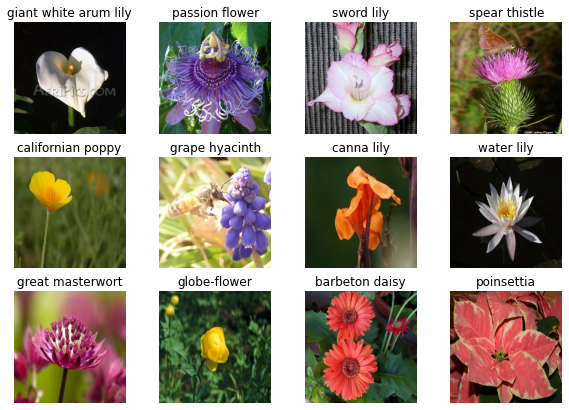

In [17]:
plt.figure(figsize=(10, 7))

for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(get_flower_name(labels[i]))
        plt.axis("off")

## Building the model

### Resizing and Normalization Layer

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

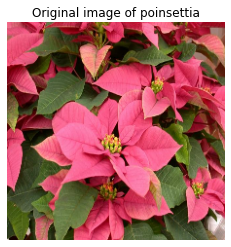

In [19]:
# Testing Resizing and Normalization Layer on a sample image
image_batch, labels_batch = next(iter(train_ds))
image, label = image_batch[0], labels_batch[0]
image = tf.expand_dims(image, 0)

plt.imshow(image[0].numpy().astype("uint8"))
plt.title(f"Original image of {get_flower_name(label)}")
plt.axis("off")
plt.show()

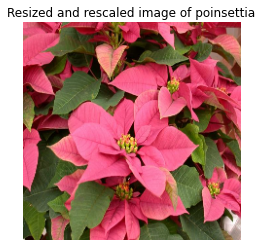

Image shape (224, 224, 3)
Min and max pixel values: 0.0 1.0


In [20]:
resized_and_normalized_img = resize_and_rescale(image)
plt.imshow(resized_and_normalized_img[0])
plt.title(f"Resized and rescaled image of {get_flower_name(label)}")
plt.axis("off")
plt.show()

print("Image shape", resized_and_normalized_img[0].shape)
print("Min and max pixel values:", resized_and_normalized_img[0].numpy().min(), resized_and_normalized_img[0].numpy().max())

### Data Augmentation Layer

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1)  
])

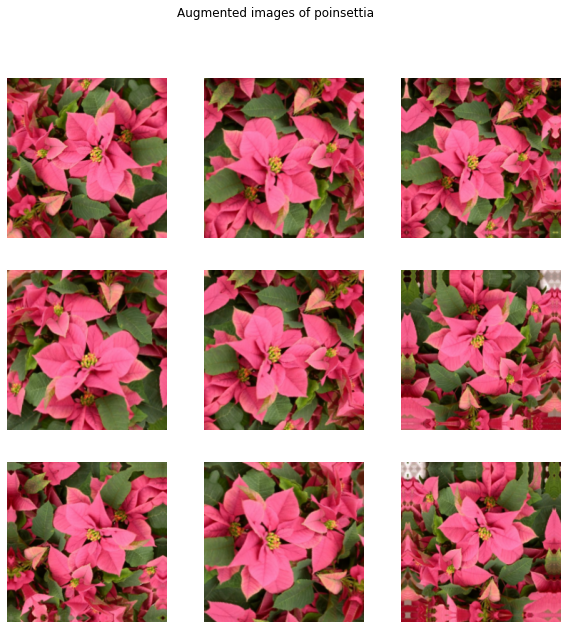

In [22]:
# Data Augmentation Layer on a sample image
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")
plt.suptitle(f"Augmented images of {get_flower_name(label)}")
plt.show()

### Model

In [23]:
model = models.Sequential([
    data_augmentation,
    resize_and_rescale,
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dense(NUMBER_OF_CLASSES, activation='softmax')
])

model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (32, 224, 224, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 112, 112, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 112, 112, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 56, 56, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training the model

In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
callback = EarlyStopping(monitor='val_loss', 
                         patience=5,
                         verbose=1)

ModelCheck = ModelCheckpoint(filepath=f'../models/{model_version}/model.h5',
                             monitor='val_loss',
                             save_best_only=True)

In [28]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[callback, ModelCheck]
)

Epoch 1/100
205/205 [==============================] - 784s 4s/step - loss: 3.9207 - accuracy: 0.1032 - val_loss: 3.3508 - val_accuracy: 0.1650
Epoch 2/100
205/205 [==============================] - 16s 77ms/step - loss: 3.0951 - accuracy: 0.2199 - val_loss: 2.9963 - val_accuracy: 0.2335
Epoch 3/100
205/205 [==============================] - 16s 77ms/step - loss: 2.7096 - accuracy: 0.3051 - val_loss: 2.8088 - val_accuracy: 0.3007
Epoch 4/100
205/205 [==============================] - 14s 67ms/step - loss: 2.4380 - accuracy: 0.3576 - val_loss: 2.8153 - val_accuracy: 0.3081
Epoch 5/100
205/205 [==============================] - 17s 81ms/step - loss: 2.1943 - accuracy: 0.4119 - val_loss: 2.4869 - val_accuracy: 0.3790
Epoch 6/100
205/205 [==============================] - 14s 66ms/step - loss: 1.9968 - accuracy: 0.4621 - val_loss: 2.4909 - val_accuracy: 0.4010
Epoch 7/100
205/205 [==============================] - 14s 66ms/step - loss: 1.8377 - accuracy: 0.4989 - val_loss: 2.5441 - val_acc

Best model after 11 epochs.

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting Loss and Accuracy 

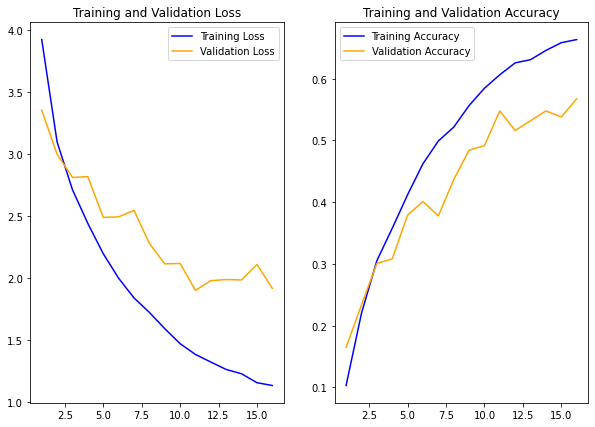

In [30]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss)+1), loss, color='blue', label='Training Loss')
plt.plot(range(1, len(val_loss)+1), val_loss, color='orange', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy)+1), accuracy, color='blue', label='Training Accuracy')
plt.plot(range(1, len(val_accuracy)+1), val_accuracy, color='orange', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Loading best model

In [31]:
best_model = models.load_model(f'../models/{model_version}/model.h5')
class_names = pickle.load(open(f'../models/{model_version}/class_names.p', 'rb'))

In [32]:
# Loss and Accuracy of validation dataset
best_model.evaluate(valid_ds)

26/26 [==============================] - 1s 26ms/step - loss: 1.8981 - accuracy: 0.5477


[1.8980873823165894, 0.5476772785186768]

### Predicting names of flowers

In [33]:
image_batch, labels_batch = next(iter(valid_ds))
image, label = image_batch[0], labels_batch[0]
image = tf.expand_dims(image, 0)

In [34]:
prediction = best_model.predict(image)
print(prediction)

[[8.79679177e-11 2.13088596e-12 5.10291522e-03 1.20295491e-02
  3.97162922e-02 1.10620074e-03 2.63988085e-07 9.24994092e-05
  2.23909428e-05 1.39462497e-09 1.68662169e-08 5.28719174e-05
  6.85023785e-01 6.57950761e-09 1.88595334e-06 7.40625694e-07
  8.76994729e-02 6.15443772e-14 1.05536486e-07 6.09871175e-04
  3.00885983e-10 1.79288545e-05 3.09566967e-04 1.71847578e-10
  9.18150254e-05 6.52694268e-07 1.74971392e-05 1.72906544e-03
  8.59610338e-09 2.36594360e-12 5.13462101e-06 2.49034376e-10
  1.48061718e-09 6.82011669e-10 2.40980626e-05 4.97910868e-08
  1.26159878e-03 5.95338543e-06 1.38437534e-02 7.82143572e-10
  1.06823826e-02 2.04962324e-02 4.61458876e-05 1.61832577e-05
  2.17707115e-08 1.38028644e-10 1.26112329e-10 9.47895984e-08
  2.57409425e-07 5.52711185e-07 1.03039195e-08 9.16954959e-05
  7.69129538e-10 3.05461169e-13 3.56222517e-06 1.54071031e-07
  6.96845564e-06 9.14915290e-07 6.65783584e-02 1.25482430e-07
  3.99103470e-07 1.46829237e-07 6.51728740e-11 6.52363918e-16
  8.1208

In [35]:
print(np.argmax(prediction))

12


In [36]:
get_flower_name(np.argmax(prediction))

'peruvian lily'

In [37]:
get_flower_name(label)

'hippeastrum'

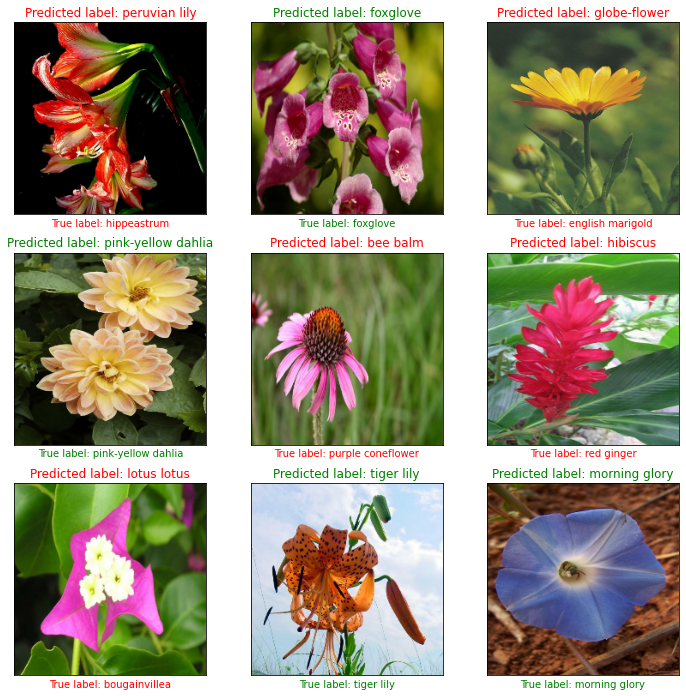

In [38]:
plt.figure(figsize=(12, 12))

for images_batch, labels_batch in valid_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    prediction = best_model.predict(tf.expand_dims(images_batch[i], 0))
    predicted_label = get_flower_name(np.argmax(prediction))
    true_label = get_flower_name(labels_batch[i])

    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'

    plt.imshow(images_batch[i].numpy().astype("uint8"))
    plt.title(f"Predicted label: {predicted_label}", color=color)
    plt.xlabel(f"True label: {true_label}", color=color)
    plt.xticks([])
    plt.yticks([])
plt.show()